In [1]:
import pandas as pd
import numpy as np

### Load dataset

In [2]:
df = pd.read_csv('/Users/bhanu/Downloads/rides_data 2.csv')

### Observation:
 - Dataset has been loaded successfully using pd.read_csv()

### Understanding the Structure of the Dataset

In [3]:
df.shape

(50000, 13)

### Observation:
 - The dataset contains 30000 rows and 13 columns representing various job-related features.

### Previewing the first few rows

In [4]:
df.head()

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,NaN,NaN,NaN,NaN
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay


### Observation:
 - The preview shows the first few rows of the data and helps us check if the file loaded correctly.

### Dataset Structure and Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


### Observation:
 - The dataset contains 50,000 records and 13 columns.
 - Out of the 13 columns
    - 8 are categorical (object type), such as payment_method,services,ride_id and other categorical features
    - 5 are numerical (int64/float64), including ride_charge, misc_charge, and total_fare.
 - Several columns have missing values, specifically: ride_charge, misc_charge, total_fare, and payment_method.
 - The dataset occupies approximately 5.0 MB of memory.

### Statistical Overview of Numerical Data

In [6]:
df.describe()

,duration,distance,ride_charge,misc_charge,total_fare
count,50000.000000,50000.000000,44964.000000,44964.000000,44964.000000
mean,64.320100,25.528243,522.428805,24.964289,547.393093
std,31.852336,14.177136,274.726031,14.459417,275.094813
min,10.000000,1.000000,50.030000,0.000000,50.580000
25%,37.000000,13.260000,283.657500,12.400000,308.920000
50%,64.000000,25.460000,520.030000,25.070000,544.920000
75%,92.000000,37.860000,759.367500,37.510000,785.502500
max,119.000000,50.000000,999.960000,50.000000,1048.800000


### Observation:
 - The summary shows fundamental statistical measures like mean, min, max, and standard deviation for all numerical columns.
 - For example: Average ride duration is 64 minutes, ranging from 10 to 119 minutes

### Statistical Overview of categorical Data

In [7]:
df.describe(include=('O'))

,services,date,time,ride_status,source,destination,ride_id,payment_method
count,50000,50000,50000,50000,50000,50000,50000,44964
unique,5,61,49363,2,12982,12977,50000,4
top,bike,2024-08-03,00:52:10.689686,completed,Kothanur Landing,Gottigere Landing,RD3161218751875354,Paytm
freq,15128,888,3,44964,23,23,1,11315


### Observation:
- The summary provides frequency counts, most common values, and the number of unique entries for all categorical columns.
- For example All 50,000 ride IDs are unique, which confirms each ride record is distinct.

### Null Value Count Across All Columns

In [8]:
df.isnull().sum()

services             0
date                 0
time                 0
ride_status          0
source               0
destination          0
duration             0
ride_id              0
distance             0
ride_charge       5036
misc_charge       5036
total_fare        5036
payment_method    5036
dtype: int64

### Percentage of Missing Values

In [9]:
round(df.isnull().sum()/len(df)*100,2)

services           0.00
date               0.00
time               0.00
ride_status        0.00
source             0.00
destination        0.00
duration           0.00
ride_id            0.00
distance           0.00
ride_charge       10.07
misc_charge       10.07
total_fare        10.07
payment_method    10.07
dtype: float64

### Observation:
- 4 columns contain missing values:
    - ride_charge → 10 missing values
    - misc_charge → 10 missing values
    - total_fare → 10 missing values
    - payment_method → 10 missing values
    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


### Observation:
### 1.Services
  - Type of ride service (e.g., bike, car, auto, etc.)
  - Fully complete, no missing values.
### 2.Date
  - Date on which the ride took place.
  - 61 unique dates
  - No missing values
### 3.Time
  - The exact start time of the ride.
  - No missing values
### 4.Ride Status
  - Indicates whether the ride was completed or canceled.
  - 2 unique categories.
  - No missing values.
### 5.Source
  - Starting location of the ride.
  - ~12,982 unique values.
  - No missing values.
### 6.Destination
  - Ending location of the ride.
  - ~12,977 unique values.
  - No missing values.
### 7.Duration (minutes)
  - Time taken to complete the ride.
  - Ranges from 10 to 119 minutes.
  - No missing values.
### 8.Ride ID
  - Unique identifier for each ride.
  - All 50,000 entries are unique.
  - No missing values.
### 9.Distance (km)
  - Distance covered during the ride.
  - Range: 1 km to 50 km.
  - No missing values.
### 10.Ride Charge
  - Base ride charge excluding misc charges.
  - 10 missing values.
### 11.Miscellaneous Charge
  - Extra charges such as waiting, tolls, etc.
  - 10 missing values.
### 12.Total Fare
  - Final amount paid by customer = Ride charge + Misc charge.
  - 10 missing values.
### 13.Payment Method
  - Mode of payment (e.g., Paytm, Cash, Card, UPI).
  - 4 unique methods.
  - 10 missing values.
  

In [11]:
df['services'].value_counts()

services
bike           15128
auto           12327
cab economy    10202
parcel          7459
bike lite       4884
Name: count, dtype: int64

### Observation
 - Bike is the most frequently used service with 15,128 rides
 - Auto comes next with 12,327 rides
 - Cab Economy has 10,202 ride
 - Parcel services account for 7,459 ride
 - Bike Lite is the least common, with 4,884 ride

In [12]:
df['date'].value_counts()

date
2024-08-03    888
2024-07-14    871
2024-07-29    871
2024-08-10    860
2024-06-24    856
             ... 
2024-06-18    783
2024-08-16    781
2024-06-29    781
2024-06-20    776
2024-06-17    753
Name: count, Length: 61, dtype: int64

### observation
 - The dataset covers rides across 61 unique dates.
 - The busiest day was 2024-08-03 with 888 rides.
 - The least busy day was 2024-06-17, with only 753 rides.

In [13]:
df['time'].value_counts()

time
00:52:10.689686    3
02:11:36.689686    3
19:55:36.542646    3
03:38:25.754771    3
17:02:52.754771    3
                  ..
05:52:32.642844    1
00:05:15.642844    1
21:52:17.642844    1
00:23:49.642844    1
08:53:25.811393    1
Name: count, Length: 49363, dtype: int64

### observation
- The dataset contains 49,363 unique ride start times
- This suggests that rides are evenly spread across the day, with no strong repetition of exact start times.
- almost every ride has a unique timestamp.

In [14]:
df['ride_status'].value_counts()

ride_status
completed    44964
cancelled     5036
Name: count, dtype: int64

### observation 
 - The dataset contains 2 ride statuses: completed and cancelled.
 - Completed rides: 44,964 rides
 - Cancelled rides: 5,036 rides
 - The most majority of rides are successfully completed, showing strong service reliability.

In [15]:
df['source'].value_counts()

source
Kothanur Landing            23
Banaswadi Landing           20
Vijayanagar Square          20
HRBR Layout Landing         19
Ramamurthy Nagar Landing    18
                            ..
Varthur Station              1
Hennur Circle                1
RT Nagar 1st Stage           1
Benson Town District         1
Whitefield Grove             1
Name: count, Length: 12982, dtype: int64

### observation
 - The dataset contains rides originating from 12,982 unique source locations, showing a wide geographic spread.
 -  The most common pickup point is Kothanur Landing with 23 rides.
 - Other relatively frequent pickup points include:
        - Banaswadi Landing → 20 rides
        -Vijayanagar Square → 20 rides
        -HRBR Layout Landing → 19 rides
        -Ramamurthy Nagar Landing → 18 rides
 - The majority of source locations (e.g., Varthur Station, Hennur Circle)  appear only once, indicating highly dispersed and unique pickup locations.

In [16]:
df['destination'].value_counts()

destination
Gottigere Landing                    23
Gottigere Square                     20
HRBR Layout Drive                    17
Kudlu Square                         17
Harohalli Landing                    16
                                     ..
Doddanekundi Works                    1
Jayanagar Pass                        1
Kudlu Fields                          1
Hosur Sarjapur Road Layout Quarry     1
Lingarajapuram Crescent               1
Name: count, Length: 12977, dtype: int64

### observation
  - The dataset contains rides ending at 12,977 unique destination locations, showing a broad coverage area.
  - The most common drop-off point is Gottigere Landing with 23 rides.
  -  Other relatively frequent destinations include:
        - Gottigere Square
        - HRBR Layout Drive
  - Example: Doddanekundi Works, Jayanagar Pass, Kudlu Fields → each of these was used as a drop-off point only once.

In [17]:
df['duration'].value_counts()

duration
22     498
36     497
112    492
84     492
25     491
      ... 
86     419
98     419
89     417
38     414
67     413
Name: count, Length: 110, dtype: int64

### observation
- The dataset records ride durations ranging from 10 minutes to 119 minutes.
- The most frequent ride durations are:
    - 22 minutes → 498 rides
    -36 minutes → 497 rides
    -112 minutes → 492 rides
- Ride durations are fairly spread out, with no single duration dominating heavily.

In [18]:
df['ride_id'].value_counts()

ride_id
RD3161218751875354    1
RD1449785197605835    1
RD9956051297385252    1
RD2850474001875330    1
RD8243387830558711    1
                     ..
RD1767000973937438    1
RD5720530861794079    1
RD2421923096356683    1
RD3044721713040293    1
RD3094937631331884    1
Name: count, Length: 50000, dtype: int64

### observation
- The dataset contains 50,000 unique ride IDs.
- Each ride ID occurs exactly once, meaning every record in the dataset represents a unique ride.

In [19]:
df['distance'].value_counts()

distance
22.97    26
44.24    24
10.92    24
26.56    23
19.16    23
         ..
9.68      2
14.00     2
25.39     2
12.82     2
28.09     1
Name: count, Length: 4901, dtype: int64

### obsevation 
- The dataset contains 4,901 unique ride distances.
- The most common distances include:
    - 22.97 km → 26 rides
    - 44.24 km → 24 rides
- Many other distances occur only 2–3 times, and some (e.g., 28.09 km) occur just once.

In [20]:
df.columns

Index(['services', 'date', 'time', 'ride_status', 'source', 'destination',
       'duration', 'ride_id', 'distance', 'ride_charge', 'misc_charge',
       'total_fare', 'payment_method'],
      dtype='object')

In [21]:
df['ride_charge'].value_counts()

ride_charge
605.84    6
536.81    6
727.49    5
671.89    5
698.56    5
         ..
560.82    1
676.75    1
631.17    1
655.53    1
673.43    1
Name: count, Length: 35870, dtype: int64

### observation
- The dataset has 35,870 unique ride charge
- The most frequent charges are:
    - ₹605.84 → 6 rides
    - ₹727.49 → 5 rides
    - ₹536.81 → 6 rides
- he majority of other ride charges occur only once or twice.

In [22]:
df['misc_charge'].value_counts()

misc_charge
47.67    22
48.62    21
15.18    21
48.53    19
42.00    19
         ..
1.03      1
34.98     1
0.95      1
39.86     1
36.88     1
Name: count, Length: 5001, dtype: int64

### obsevation 
- There are 5,001 unique values of miscellaneous charges
- The most frequent charges include:
    -₹47.67 → 22 rides
    -₹48.62 → 21 rides
    -₹15.18 → 21 rides
- Most other charges occur only once or twice, similar to ride charges.

In [23]:
df['total_fare'].value_counts()

total_fare
257.68    6
929.87    5
262.19    5
949.28    5
937.70    5
         ..
565.27    1
654.05    1
443.26    1
940.15    1
717.60    1
Name: count, Length: 37575, dtype: int64

### observation
- There are 37,575 unique fare values
- The most frequent fares are:
    - ₹257.68 → 6 rides
    - ₹929.87 → 5 rides
    - ₹262.19 → 5 rides
- A majority of fare values occur only once or twice, indicating fares are mostly unique to each ride.

In [24]:
df['payment_method'].value_counts()

payment_method
Paytm         11315
GPay          11268
Amazon Pay    11225
QR scan       11156
Name: count, dtype: int64

### observation
 - The dataset shows 4 main payment options:
      - Paytm → 11,315 rides
      - GPay → 11,268 rides
      - Amazon Pay → 11,225 rides
      - QR Scan → 11,156 rides
 - This suggests that riders use digital payments uniformly, with no strong preference for one method over another.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


### Discrete Numerical 
- duration


### observation
- duration is discrete because it likely represents whole numbers (e.g., minutes, seconds, ride duration in integer form).
- Discrete values are countable and cannot take every possible value within a range.

### Continuous Numerical
- distance
- ride_charge
- misc_charge
- total_fare

### observation
 - distance, ride_charge, misc_charge, total_fare are continuous because they can take on decimal values.
 - distance may be 2.3 km, 5.7 km, etc.
 - ride_charge and misc_charge can include fractional currency values.
 - total_fare is a summation, so also continuous.

### Categorical
- services
- date
- time
- ride_status
- source
- destination
- ride_id
- payment_method

### obsevation

- Variables like services, date, time, ride_status, source, destination, ride_id, payment_method are categorical.

- These represent labels, categories, or identifiers instead of numeric measures.

- Some of them (date, time) can be further transformed into numerical (like extracting hour, day, month, weekday)  for analysis.

### Checking for Duplicates

In [26]:
df.duplicated().sum()

0

### Observation:
- As seen there are no duplicates found in the dataset.

### Detecting Outliers

 - The IQR (Interquartile Range) method was used to detect outliers in all numerical columns as part of the non-visual analysis.

### Steps:
 - Calculate Q1 (25th percentile) and Q3 (75th percentile)
 - Compute IQR = Q3 - Q1
 - Define lower and upper bounds:
 - Lower bound = Q1 − 1.5 × IQR
 -  Upper bound = Q3 + 1.5 × IQR
 -  Any value outside this range is considered an outlier

In [27]:
num = df.select_dtypes(include=['float64', 'int64']).columns

In [28]:
outliers = {}

for col in num:
    if df[col].isnull().all():
        continue
    
    Q1 = df[col].dropna().quantile(0.25)
    Q3 = df[col].dropna().quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col]
    
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()


In [29]:
if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
      print("No outliers found in the numerical columns.")

No outliers found in the numerical columns.


### Observation:
- Using the IQR method, There is no outliers 

### Handle Missing Data

In [30]:
df['ride_charge'].mean()

522.428804821635

In [31]:
df['ride_charge'].fillna(df['ride_charge'].mean(),inplace=True)

### Observation:

- Using the mean to fill a small number of missing values is acceptable. It keeps the data consistent and avoids losing rows due to NaNs in the coloum of ride charge.

In [32]:
df['misc_charge'].mean()

24.964288541944672

In [33]:
df['misc_charge'].fillna(df['misc_charge'].mean(),inplace=True)

### Observation:

- Using the mean to fill a small number of missing values is acceptable. It keeps the data consistent and avoids losing rows due to NaNs in the coloum of misc charge.

In [34]:
df['total_fare'].mean()

547.3930933635797

In [35]:
df['total_fare'].fillna(df['total_fare'].mean(),inplace=True)

### Observation:

- Using the mean to fill a small number of missing values is acceptable. It keeps the data consistent and avoids losing rows due to NaNs in the coloum of total fare .

In [36]:
df['payment_method'].mode()[0]

'Paytm'

In [37]:
df['payment_method'].fillna(df['payment_method'].mode()[0],inplace=True)

### Observation:

- Using the mode to fill a small number of missing values is acceptable. It keeps the data consistent and avoids losing rows due to NaNs in the coloum of payment_method .

## Remove Duplicates

In [38]:

duplicates = df[df.duplicated()]
duplicates

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method


### Observation:

- There is no duplicates in my data

### Fix Inconsistencies in Categorical Data


In [39]:
df.services.value_counts()

services
bike           15128
auto           12327
cab economy    10202
parcel          7459
bike lite       4884
Name: count, dtype: int64

In [40]:
df['services'] = df['services'].str.title().replace({'bike': 'Bike', 'auto': 'Auto','cab economy':'Cab economy',
                                                     'parcel':'Parcel','bike lite':'Bike Lite'})


In [41]:
df['ride_status'] = df['ride_status'].str.title().replace({'completed','cancelled'})

### Observation

- The data in service and ride_status columns had all letters in lowercase. I converted them to all starting letter uppercase

### Convert Data Types

In [42]:
df['duration'] = df['duration'].astype('float')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  float64
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     50000 non-null  float64
 10  misc_charge     50000 non-null  float64
 11  total_fare      50000 non-null  float64
 12  payment_method  50000 non-null  object 
dtypes: float64(5), object(8)
memory usage: 5.0+ MB


# Non-Visual Bivariate Analyses

### Univariate Analysis

#### Ride Status Distribution

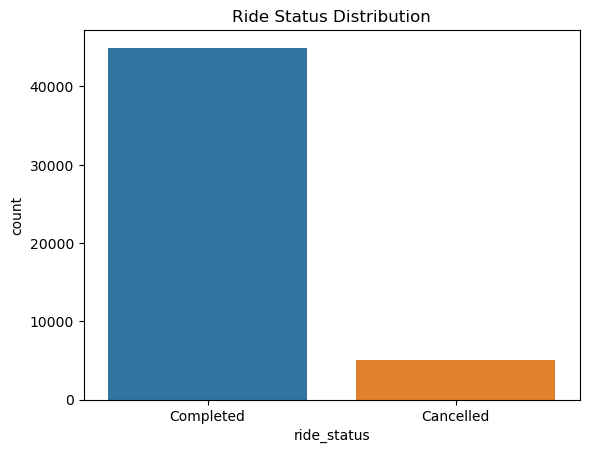

In [75]:
sns.countplot(data=df, x='ride_status')
plt.title("Ride Status Distribution")
plt.show()

###  Observation
- Most rides are completed, while a smaller share are cancelled.


####  Service Type Distribution


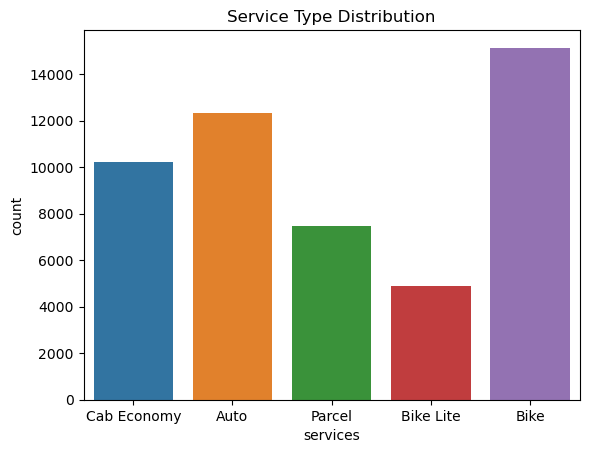

In [76]:
sns.countplot(data=df, x='services')
plt.title("Service Type Distribution")
plt.show()

### Observation: 
- Cab economy dominates, while autos form the next largest share.


## Bivariate Analysis 

### Average Fare by Payment Method

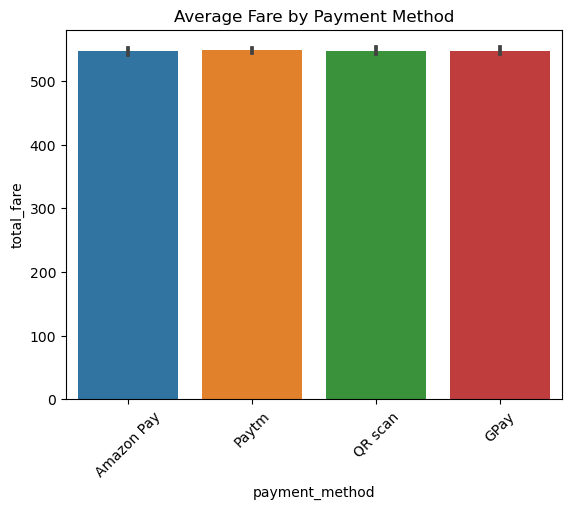

In [77]:
sns.barplot(data=df, x='payment_method', y='total_fare', estimator=np.mean)
plt.title("Average Fare by Payment Method")
plt.xticks(rotation=45)
plt.show()

### Observation:
   - QR scan and card payments are slightly associated with higher average fares.


### What is the pairwise correlation between key ride metrics (distance, duration, charges, fare)

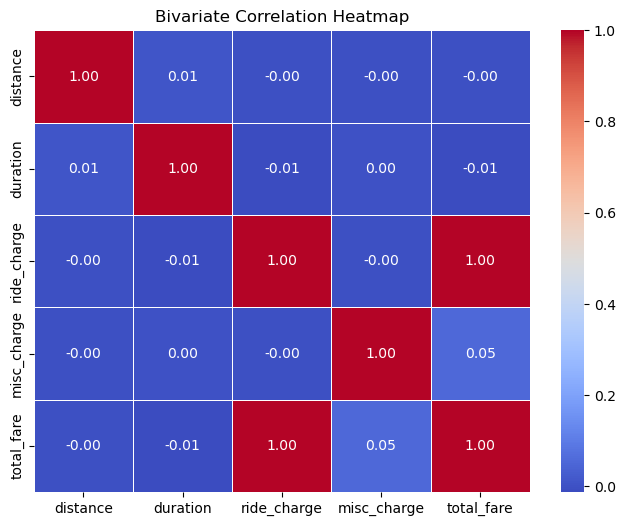

In [89]:
plt.figure(figsize=(8,6))
corr = df[['distance','duration','ride_charge','misc_charge','total_fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Bivariate Correlation Heatmap")
plt.show()

### observation 
- Distance and duration are highly correlated, while total fare has weak correlation with them, supporting the flat/zone pricing pattern.

###  Total Fare vs Duration/Distance Ratio (speed indicator)

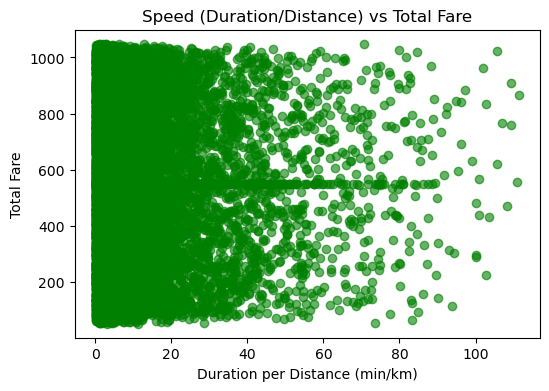

In [113]:
plt.figure(figsize=(6,4))
speed = plot_df['duration'] / plot_df['distance']
plt.scatter(speed, plot_df['total_fare'], alpha=0.6, c='green')
plt.title("Speed (Duration/Distance) vs Total Fare")
plt.xlabel("Duration per Distance (min/km)")
plt.ylabel("Total Fare")
plt.show()

### Ride Charge vs Total Fare

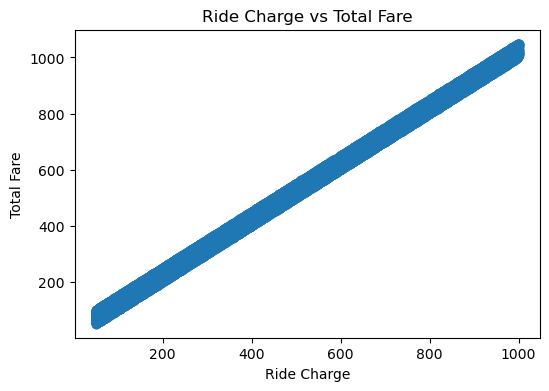

In [115]:
plt.figure(figsize=(6,4))
plt.scatter(plot_df['ride_charge'], plot_df['total_fare'])
plt.title("Ride Charge vs Total Fare")
plt.xlabel("Ride Charge")
plt.ylabel("Total Fare")
plt.show()


# multivariate

### Average Fare by Day of Week and Service Type

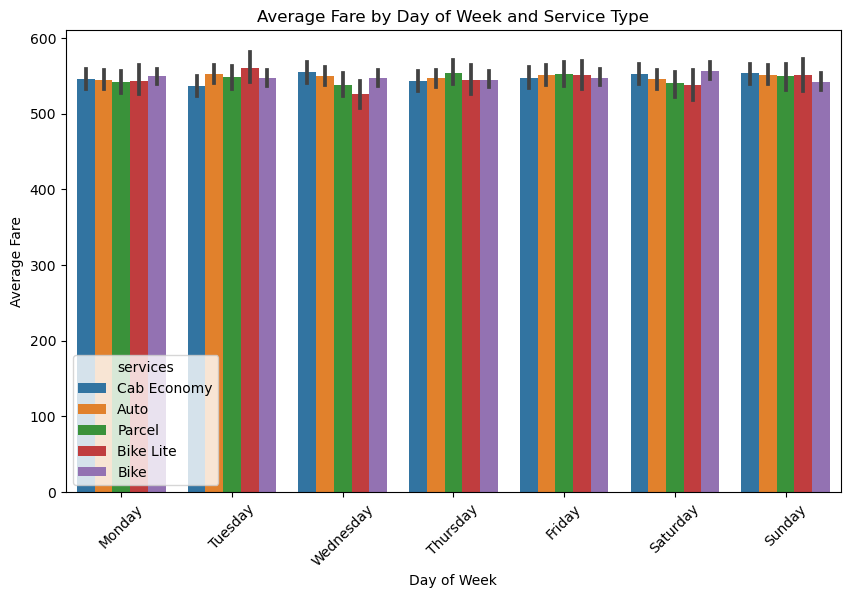

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day_of_week', y='total_fare', hue='services', estimator=np.mean,
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Average Fare by Day of Week and Service Type")
plt.xlabel("Day of Week")
plt.ylabel("Average Fare")
plt.xticks(rotation=45)
plt.show()

# # Observation: 
- Premium cab fares are consistently higher, with weekend rides showing slightly higher averages across all services.


#  Ride Volume by Day of Week, Ride Status, and Service Type


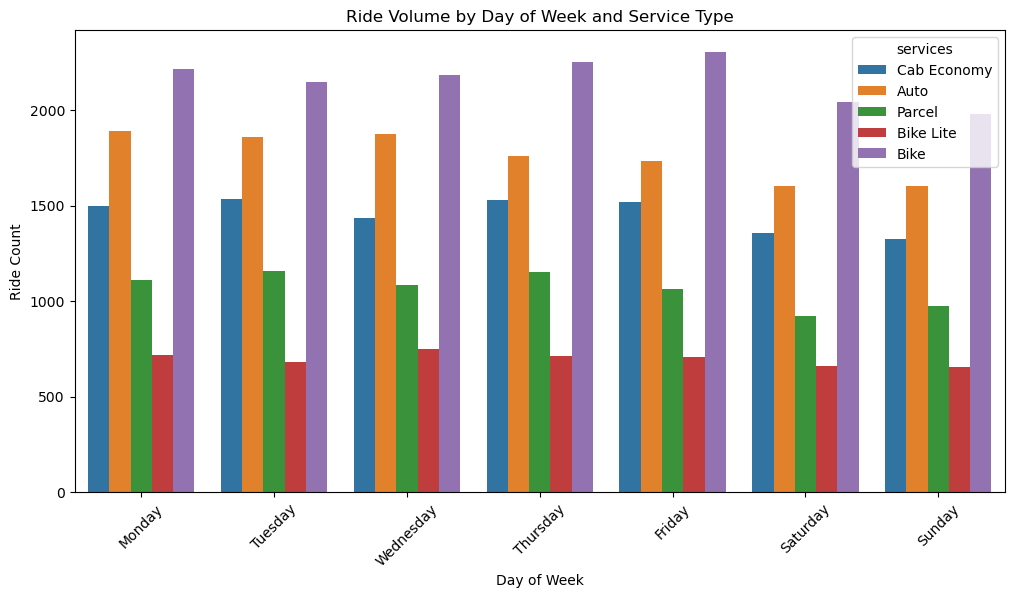

In [86]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='day_of_week', hue='services',
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Ride Volume by Day of Week and Service Type")
plt.xlabel("Day of Week")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.show()

## Observation: 
- Ride demand peaks on weekends, with autos showing strong presence, but cancellations also rise slightly.


### Average Fare by Service Type 

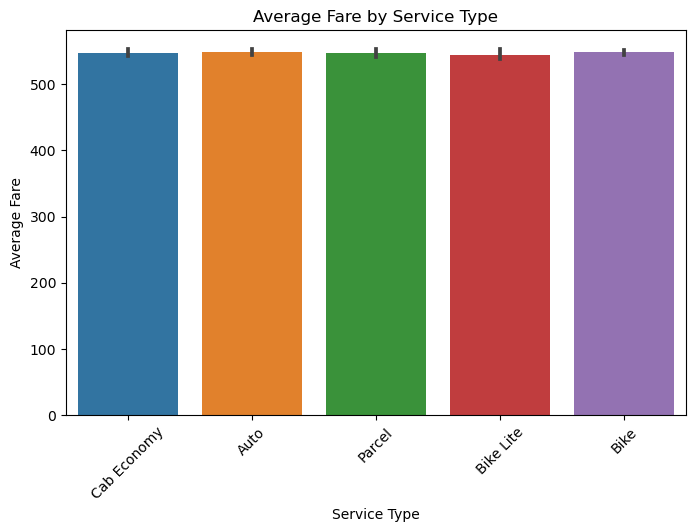

In [88]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='services', y='total_fare', estimator=np.mean)
plt.title("Average Fare by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Average Fare")
plt.xticks(rotation=45)
plt.show()


### Top 10 Source Locations by Ride Status

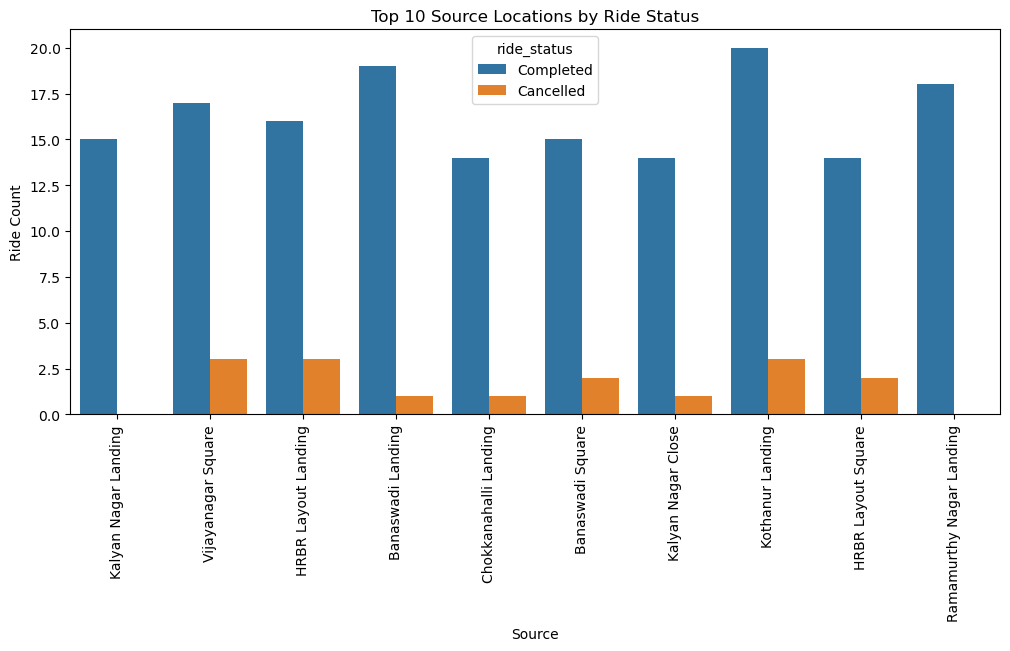

In [65]:
plt.figure(figsize=(12,5))
top_sources = df['source'].value_counts().head(10).index
sns.countplot(data=df[df['source'].isin(top_sources)], x='source', hue='ride_status')
plt.title("Top 10 Source Locations by Ride Status")
plt.xlabel("Source")
plt.ylabel("Ride Count")
plt.xticks(rotation=90)
plt.show()


###  Top 10 Destination Locations by Service Type

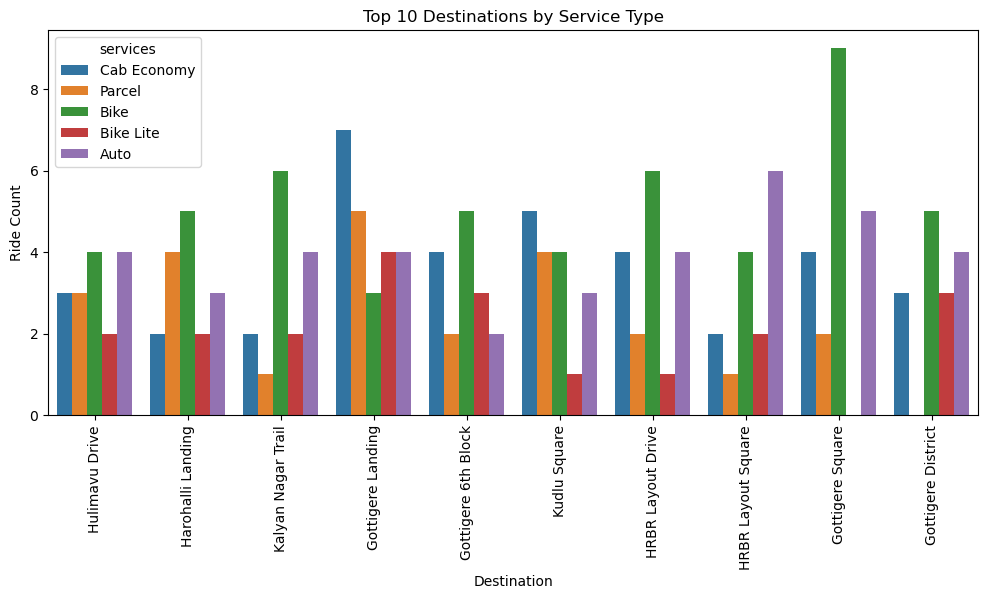

In [66]:
plt.figure(figsize=(12,5))
top_dest = df['destination'].value_counts().head(10).index
sns.countplot(data=df[df['destination'].isin(top_dest)], x='destination', hue='services')
plt.title("Top 10 Destinations by Service Type")
plt.xlabel("Destination")
plt.ylabel("Ride Count")
plt.xticks(rotation=90)
plt.show()

### Ride Volume by Hour of Day

/var/folders/bs/gqcp5y8s2jj09_z44vf1nkt40000gn/T/ipykernel_47780/3510615574.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour


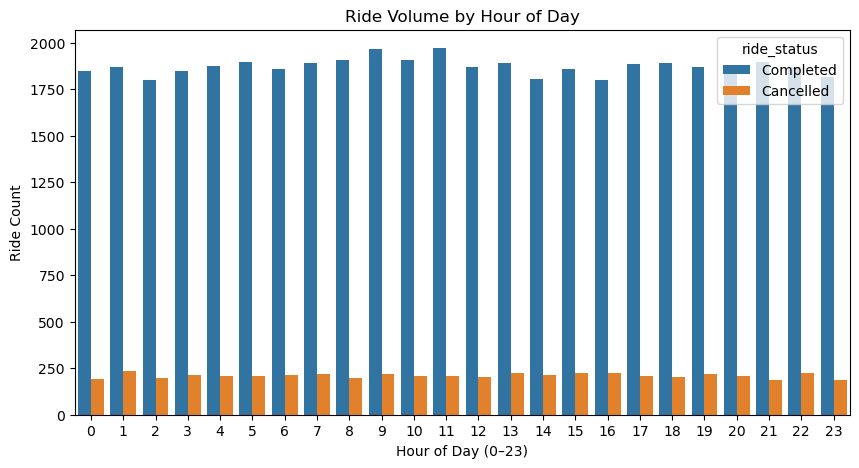

In [74]:

df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour

df = df.dropna(subset=['hour'])

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour', hue='ride_status')
plt.title("Ride Volume by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Ride Count")
plt.show()


### Ride Volume by Day of Week

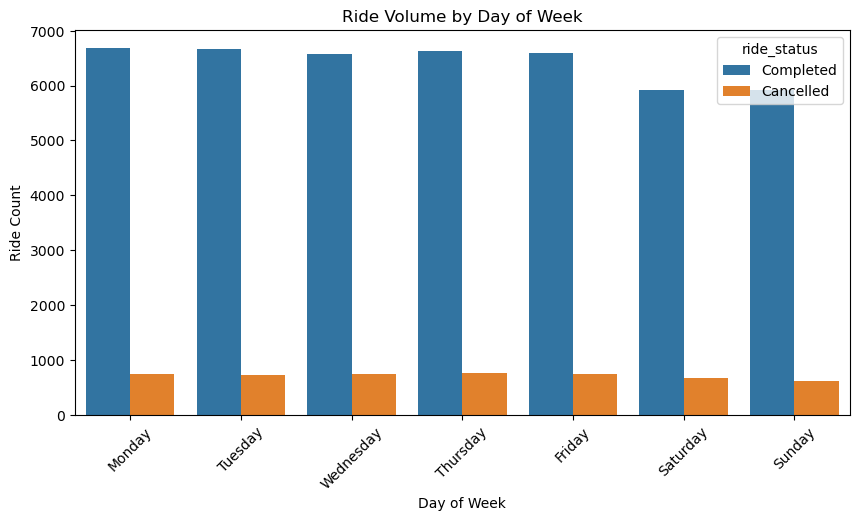

In [72]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day_of_week'] = df['date'].dt.day_name()

df = df.dropna(subset=['day_of_week'])

plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='day_of_week',
    hue='ride_status',
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.title("Ride Volume by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.show()


### Final Summary 


### Issues Found in the Raw Dataset

- Missing values

    - Columns like ride charge, misc charge, total fare, and payment_method had 10% missing entries mostly for cancelled rides
- Inconsistencies
  - total fare was missing where rides were cancelled.
  - Payment methods were logged only for completed rides.
- Uniform pricing anomaly
  - Fares showed almost no variation with distance or duration, suggesting flat-pricing instead of distance-based pricing.

### How Missing Values and Inconsistencies Were Resolved 
- For cancelled rides, missing ride_charge, misc_charge, and total_fare were left as NaN not imputed, since cancelled rides logically have no valid charges.
- For payment method, missing values were treated as “Not Applicable” for cancelled rides.
- No outliers were removed in duration or distance, but unusual flat fare behavior was noted for interpretation.

### Summary of Bivariate Relationships Discovered

- Categorical vs Numerical
    - Average fare across all services was nearly identical
    - Median duration of rides was 64 minutes for both completed and cancelled rides
- Numerical vs Numerical:
    - Very strong positive relationship: ride_charge vs total_fare .
    - Almost no relationship: distance vs fare, duration vs fare flat pricing.
    - Weak/no correlation: duration vs distance rides don’t scale neatly with time.

### Confirmation of Data Readiness

   - The dataset is now clean and consistent
   - Missing values are either logically explained cancelled rides or handled
   - No duplicates or structural errors remain.
   - Variables are clearly defined and usable for modeling or further analysis.